In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readData(filename):
    fs = open('dataset/' + filename + '.dat', 'r')    
    data = [line.strip().split('::') for line in fs]  
    fs.close()                                        
    return data
    
def trimLists(users, ratings):
    for u in users:
        del u[-1]    # remove last column: zipcode
        del u[-1]    # remove last column: occupation
    
    for r in ratings:
        del r[-1]    # remove last column: timestamp    


In [3]:
users   = readData('users')
movies  = readData('movies')
ratings = readData('ratings')
trimLists(users, ratings)

In [5]:
udf = pd.DataFrame({ 'UserID'  : pd.Series(row[0] for row in users),
                     'Gender'  : pd.Series(row[1] for row in users),
                     'Age'     : pd.Series(row[2] for row in users)})
mdf = pd.DataFrame({ 'MovieID' : pd.Series(row[0] for row in movies),
                     'Title'   : pd.Series(row[1] for row in movies),
                     'Genres'  : pd.Series(row[2] for row in movies)})
rdf = pd.DataFrame({ 'UserID'  : pd.Series(row[0] for row in ratings),
                     'MovieID' : pd.Series(row[1] for row in ratings),
                     'Rating'  : pd.Series(row[2] for row in ratings)})

In [6]:
rdf['Rating'] = rdf['Rating'].astype(int)

In [7]:
joined = pd.merge(pd.merge(udf, rdf, on='UserID'), mdf, on='MovieID')

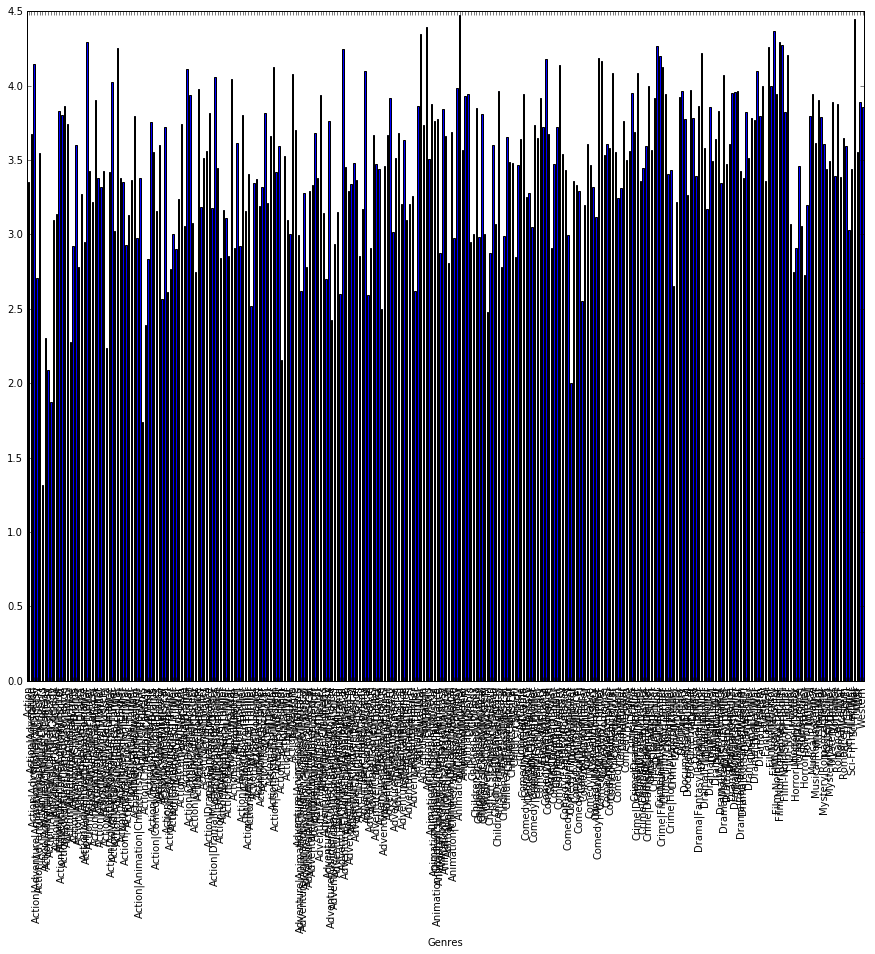

In [9]:
%matplotlib inline

means = joined['Rating'].groupby(joined['Genres']).aggregate(np.mean)
means.plot(kind='bar',figsize=(15,12))
#means